This dataset is about income for adults. There might be a lot of facts affecting one's income. I would like to dig into data and reveal the story behind.
<br>
<br>Questions I want to ask:
<br>Can I count something interesting? 
<br>Can I make a bar plot or a histogram? 
<br>Can I compare two related quantities?
<br>Looking at the plots, what are some insights I can make? 


In [1]:
#Load libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
adult_data = pd.read_csv('adult.csv')

In [3]:
adult_data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
adult_data.dtypes

age                 int64
workclass          object
fnlwgt              int64
education          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income             object
dtype: object

In [5]:
#Check if there are any null values
adult_data.isnull().values.any()

False

In [6]:
adult_data.workclass.unique()

array(['Private', 'Local-gov', '?', 'Self-emp-not-inc', 'Federal-gov',
       'State-gov', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [7]:
adult_data.education.unique()

array(['11th', 'HS-grad', 'Assoc-acdm', 'Some-college', '10th',
       'Prof-school', '7th-8th', 'Bachelors', 'Masters', 'Doctorate',
       '5th-6th', 'Assoc-voc', '9th', '12th', '1st-4th', 'Preschool'],
      dtype=object)

In [8]:
adult_data['marital-status'].unique()

array(['Never-married', 'Married-civ-spouse', 'Widowed', 'Divorced',
       'Separated', 'Married-spouse-absent', 'Married-AF-spouse'],
      dtype=object)

In [9]:
adult_data['occupation'].unique()

array(['Machine-op-inspct', 'Farming-fishing', 'Protective-serv', '?',
       'Other-service', 'Prof-specialty', 'Craft-repair', 'Adm-clerical',
       'Exec-managerial', 'Tech-support', 'Sales', 'Priv-house-serv',
       'Transport-moving', 'Handlers-cleaners', 'Armed-Forces'],
      dtype=object)

In [10]:
adult_data['relationship'].unique()

array(['Own-child', 'Husband', 'Not-in-family', 'Unmarried', 'Wife',
       'Other-relative'], dtype=object)

In [11]:
adult_data['race'].unique()

array(['Black', 'White', 'Asian-Pac-Islander', 'Other',
       'Amer-Indian-Eskimo'], dtype=object)

In [12]:
adult_data['gender'].unique()

array(['Male', 'Female'], dtype=object)

In [13]:
adult_data['native-country'].unique()

array(['United-States', '?', 'Peru', 'Guatemala', 'Mexico',
       'Dominican-Republic', 'Ireland', 'Germany', 'Philippines',
       'Thailand', 'Haiti', 'El-Salvador', 'Puerto-Rico', 'Vietnam',
       'South', 'Columbia', 'Japan', 'India', 'Cambodia', 'Poland',
       'Laos', 'England', 'Cuba', 'Taiwan', 'Italy', 'Canada', 'Portugal',
       'China', 'Nicaragua', 'Honduras', 'Iran', 'Scotland', 'Jamaica',
       'Ecuador', 'Yugoslavia', 'Hungary', 'Hong', 'Greece',
       'Trinadad&Tobago', 'Outlying-US(Guam-USVI-etc)', 'France',
       'Holand-Netherlands'], dtype=object)

In [14]:
adult_data['income'].unique()

array(['<=50K', '>50K'], dtype=object)

The "workclass", "occupation" adn "native-country" columns have unknown inpus shown as "?". It would be better to replace it with word "unknown".

In [15]:
adult_data.replace({'?':'unknown'}, inplace=True)

In [16]:
adult_data.workclass.unique()

array(['Private', 'Local-gov', 'unknown', 'Self-emp-not-inc',
       'Federal-gov', 'State-gov', 'Self-emp-inc', 'Without-pay',
       'Never-worked'], dtype=object)

<AxesSubplot:xlabel='income', ylabel='Count'>

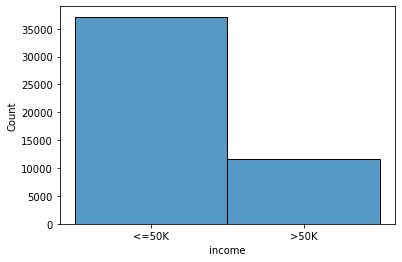

In [17]:
sns.histplot(data=adult_data, x='income')

In [18]:
(adult_data['income']=='<=50K').sum()/len(adult_data)*100

76.07182343065395

76% of the adults has an income less than 50k. 

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

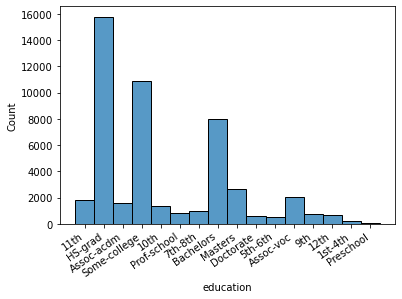

In [19]:
sns.histplot(data=adult_data, x='education')
plt.xticks(rotation=35, horizontalalignment='right')

Most of the people only have high school degree. The second-most education cateogory is "Some-college", which refers to individuals that have a high school diploma and at least three hours of college credit, but have not earned their bachelor's degree. The third-most category is "Bachelors". 

In [20]:
((adult_data['education']=='HS-grad').sum()+(adult_data['education']=='Some-college').sum()+(adult_data['education']=='Bachelors').sum())/len(adult_data)*100

71.0187952991278

The top 3 catogories already cover 71% of the sample population.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

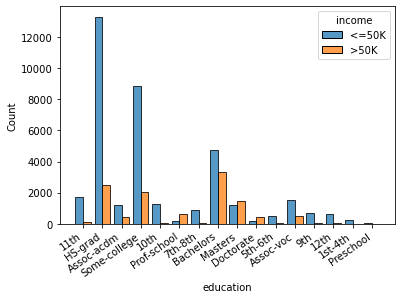

In [21]:
sns.histplot(data=adult_data, x='education', hue='income', multiple='dodge', shrink= 0.8)
plt.xticks(rotation=35, horizontalalignment='right')

(array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

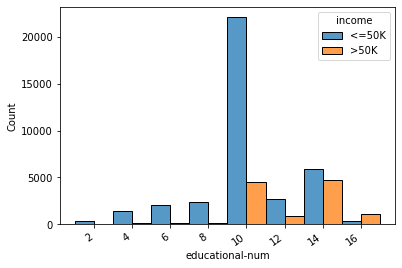

In [22]:
sns.histplot(data=adult_data, x='educational-num', hue='income', multiple='dodge', binwidth=2)
plt.xticks(rotation=35, horizontalalignment='right')

It is obvious that high education leads to higher income. People who have highest education of Professional School, Masters degree or Doctorate degree have higher chance to earn more than 50k.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

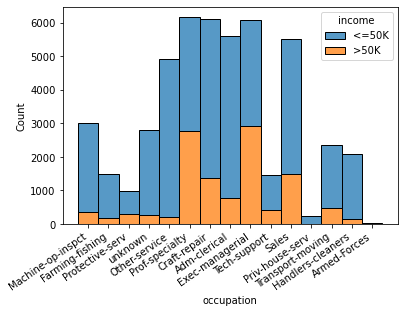

In [23]:
sns.histplot(data=adult_data, x='occupation',hue='income',multiple='stack')
plt.xticks(rotation=35, horizontalalignment='right')

'Prof-specialty' and 'Exec-managerial' have more even ditribution of population earn less or more than 50k. Most of the people have higher salary work in popular industries that require special skills.

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

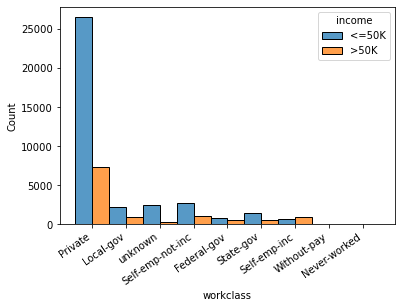

In [41]:
sns.histplot(data=adult_data, x='workclass',hue='income',multiple='dodge')
plt.xticks(rotation=35, horizontalalignment='right')

People who are incorporated self-employed has the highest potential to earn more than 50k. It sounds reasonable since people who belong to this group are usally the executive head of that corporated entity.

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

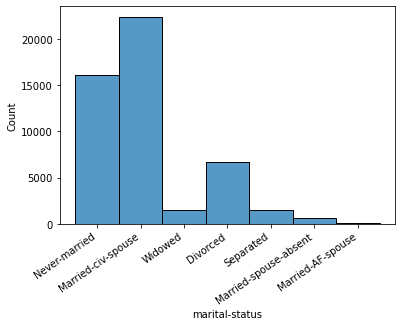

In [24]:
sns.histplot(data=adult_data, x='marital-status')
plt.xticks(rotation=35, horizontalalignment='right')

Most of the people are either married or never married before.

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

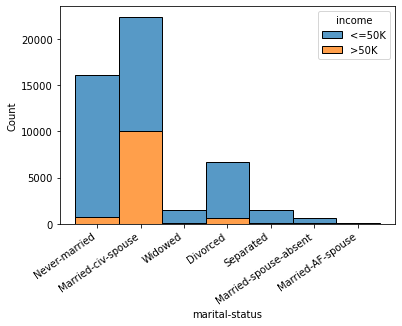

In [25]:
sns.histplot(data=adult_data, x='marital-status',hue='income',multiple='stack')
plt.xticks(rotation=35, horizontalalignment='right')

However, it is very interesting that most married people earn more than 50k. It might be related to the family presure. Married people tends to have dependents that require more expense.

<AxesSubplot:xlabel='age', ylabel='Count'>

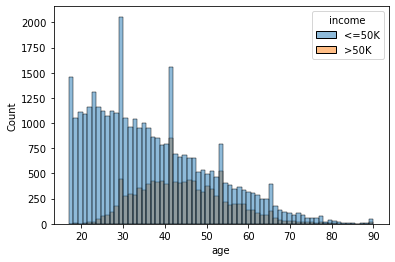

In [26]:
sns.histplot(data=adult_data, x='age', hue='income')

Looking at the distribution of age and its relationship to income, we can see that younger people between 20s to 30s mostly have income less than 50k. When it gets to 30s to 40s, the portion who earns more than 50k is about 40-50% of portion who earns less than 50k. Thie proportion went even higher between 40s to 50s and decreased after. It shows that people tends to earn more at the middle age. It might because he or she reaches the peak of his/her career or get in to the management position which usally earns more.

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Never-married'),
  Text(1, 0, 'Married-civ-spouse'),
  Text(2, 0, 'Widowed'),
  Text(3, 0, 'Divorced'),
  Text(4, 0, 'Separated'),
  Text(5, 0, 'Married-spouse-absent'),
  Text(6, 0, 'Married-AF-spouse')])

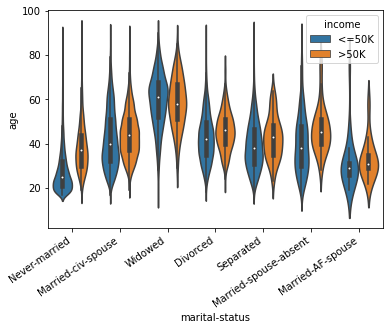

In [27]:
sns.violinplot(x='marital-status', y='age', data=adult_data, hue='income')
plt.xticks(rotation=35, horizontalalignment='right')

It seems like in each marriage status, people earn more than 50k tend to be older than people earn less than 50k.

<AxesSubplot:xlabel='capital-gain', ylabel='Count'>

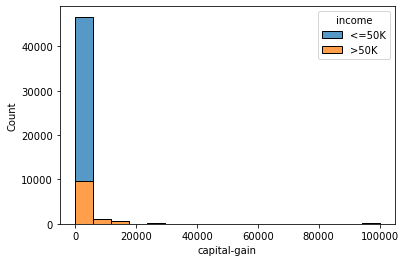

In [28]:
sns.histplot(data=adult_data, x='capital-gain', hue='income',multiple='stack')

<AxesSubplot:xlabel='capital-loss', ylabel='Count'>

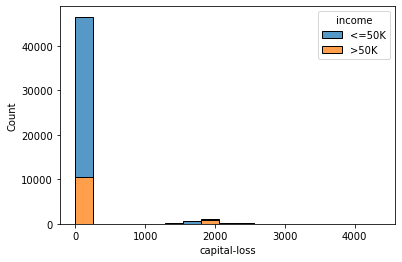

In [29]:
sns.histplot(data=adult_data, x='capital-loss', hue='income',multiple='stack')

Both capital gain and capital loss are highly skewed dataset. These two columns describe loss or gain from financial investments. 

In [30]:
(adult_data['capital-gain']==0).sum()/len(adult_data)*100

91.73866754023177

In [31]:
(adult_data['capital-loss']==0).sum()/len(adult_data)*100

95.3277916547234

However, most of people do not invest. The data did not speak much about the relationship to income.

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

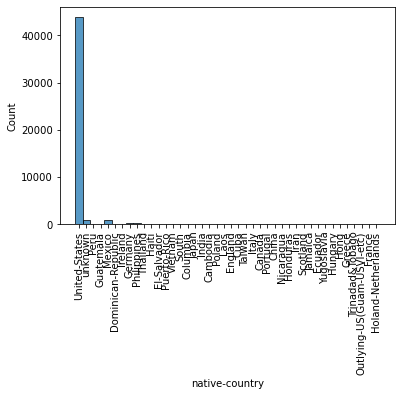

In [32]:
sns.histplot(data=adult_data, x='native-country')
plt.xticks(rotation=90)

Similarly, the 'native-country' column is also highly skewed. It is hard to tell anything related to income.

<AxesSubplot:xlabel='hours-per-week', ylabel='Count'>

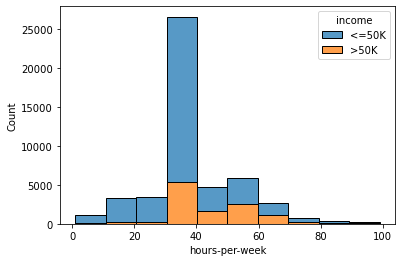

In [33]:
sns.histplot(data=adult_data, x='hours-per-week', hue='income', bins=10, multiple='stack')

As shown above, people who earn more also tend to work longer than 40hr per week.

<AxesSubplot:xlabel='income', ylabel='Count'>

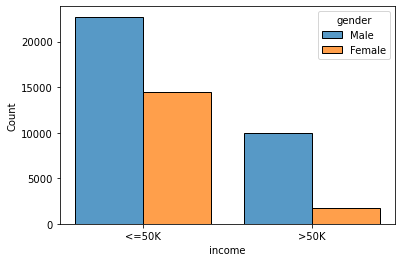

In [35]:
sns.histplot(x='income', data=adult_data, hue='gender', multiple='dodge', shrink= 0.8)

It looks like that there are gender bias in the job market. Male typically earns more comparing to female. The difference gets extremely big when looking at the group that earns more than 50k. 

<AxesSubplot:xlabel='income', ylabel='Count'>

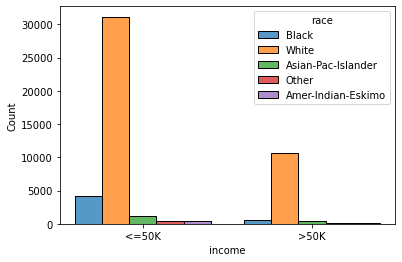

In [36]:
sns.histplot(x='income', data=adult_data, hue='race', multiple='dodge', shrink= 0.8)

Most of people in this dataset are white people.

<AxesSubplot:xlabel='race', ylabel='Count'>

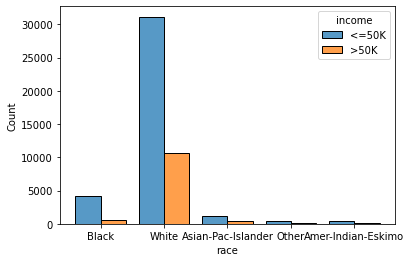

In [37]:
sns.histplot(x='race', data=adult_data, hue='income', multiple='dodge', shrink= 0.8)

In [38]:
print('There are',((adult_data['income']=='<=50K')&(adult_data['race']=='Black')).sum()/((adult_data['race']=='Black').sum())*100, 'percent of Black people has income less than 50k.')
print('There are',((adult_data['income']=='<=50K')&(adult_data['race']=='White')).sum()/((adult_data['race']=='White').sum())*100, 'percent of White people has income less than 50k.')
print('There are',((adult_data['income']=='<=50K')&(adult_data['race']=='Asian-Pac-Islander')).sum()/((adult_data['race']=='Asian-Pac-Islander').sum())*100, 'percent of Asian-Pac-Islander people has income less than 50k.')
print('There are',((adult_data['income']=='<=50K')&(adult_data['race']=='Amer-Indian-Eskimo')).sum()/((adult_data['race']=='Amer-Indian-Eskimo').sum())*100, 'percent of Amer-Indian-Eskimo people has income less than 50k.')
print('There are',((adult_data['income']=='<=50K')&(adult_data['race']=='Other')).sum()/((adult_data['race']=='Other').sum())*100, 'percent has income less than 50k for all other people.')

There are 87.91889007470651 percent of Black people has income less than 50k.
There are 74.60131219769168 percent of White people has income less than 50k.
There are 73.07439104674127 percent of Asian-Pac-Islander people has income less than 50k.
There are 88.29787234042553 percent of Amer-Indian-Eskimo people has income less than 50k.
There are 87.68472906403942 percent has income less than 50k for all other people.


White people and Asian-Pacific Islander have higher potential to earn more than 50k a year.

# Conclusion

After exploring the dataset, I found that capital gain/loss and country of orgin are not quite related to income. On the other hand, education, age, gender, race, and etc. are all very important factors that lead to higher income. 
<br><br>
If we picture a person who earns more than 50k, one is highly possible to have education higher than high school, likely to be a white male or a maler whose an asian pacific islander. Morevoer, one might work more than 40 hours per week, has an age that ranges from 35-45, is married to a civilian spouse. 